# IMPORT MODULES & LOAD DATA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Dataset: Real State.csv

Source: Metros Cubicos
Date: September 22 2020

Description: Measurements are related to M2 of Terrain, M2 of Construction, and Price of Property

* Variables/Columns
* PRICE: Price of Property
* SQUARED_METERS: Squared Meters of Property Terrain
* BUILD_SQUARED_METERS: Squared Meters of build property

**Hypothesis**: Can we predict the price from Metros Cubicos CDMX Dataset using the measurements of Squared Meters?

In [2]:
# Read the csv file into a pandas DataFrame

realestate = pd.read_csv('CDMX20_Reat_State.csv')
realestate.head()

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address
0,16500000.0,793771458,4,19.383400,-99.153381,7,4.0,252.0,490.0,"EXCELENTE OPORTUNIDAD PARA INVERSIONISTAS, CON...","Palenque 413, Narvarte, Benito Juarez, Distrit..."
1,22000000.0,822644893,4,19.390625,-99.176448,2,5.0,650.0,650.0,Casa muy amplia con 650 m2 de construccion y e...,"Alabama 89, Napoles, Benito Juarez, Distrito F..."
2,26000000.0,823060505,6,19.355168,-99.176567,4,4.0,345.0,347.0,Vive en una de las colonias con mayor plusvali...,"Manzano 30, Florida, Alvaro Obregon, Distrito ..."
3,43000000.0,822087474,15,19.361988,-99.661890,4,6.0,416.0,601.0,EXCELENTE CASA EN VENTA EN CUMBRES SANTA FE \n...,"Santa Fe Cuajimalpa, Cuajimalpa De Morelos, Di..."
4,18500000.0,823066941,5,19.353775,-99.157975,5,5.0,167.0,302.0,"Espectacular casa en venta, excelente ubicacio...","Xicotencatl 240, Del Carmen, Coyoacan, Distrit..."


# EXPLORE AND CLEAN DATA FOR NULLS

In [3]:
#Describe Data
realestate.describe()

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters
count,9.913000e+03,9.913000e+03,9913.000000,9913.000000,9913.000000,9913.000000,9908.000000,9913.000000,9833.000000
mean,1.601585e+07,9.949530e+08,7.317966,19.362999,-99.248811,3.447897,2.928744,702.975534,347.026787
std,1.076912e+08,2.336784e+09,3.955357,0.064859,0.218440,1.481502,1.448685,5052.085342,271.950694
min,1.200000e+05,4.648565e+08,1.000000,18.727068,-99.999353,0.000000,-1.000000,1.000000,0.000000
25%,2.729800e+06,7.835243e+08,5.000000,19.313780,-99.301985,3.000000,2.000000,150.000000,175.000000
50%,6.900000e+06,8.020715e+08,7.000000,19.356469,-99.164080,3.000000,3.000000,230.000000,276.000000
75%,1.743100e+07,8.129334e+08,9.000000,19.403599,-99.131550,4.000000,4.000000,480.000000,450.000000
max,8.229770e+09,8.238940e+10,16.000000,20.021108,-98.563938,45.000000,33.000000,315000.000000,4883.000000


In [4]:
# Shape the dataframe
realestate.shape

(9913, 11)

In [5]:
#Describing Types
realestate.dtypes

price                     float64
id_publicacion              int64
id_city                     int64
house_lat                 float64
house_long                float64
rooms                       int64
bathrooms                 float64
squared_meters            float64
builded_squared_meters    float64
house_details              object
address                    object
dtype: object

In [6]:
#Count to identify Nulls
realestate.count()

price                     9913
id_publicacion            9913
id_city                   9913
house_lat                 9913
house_long                9913
rooms                     9913
bathrooms                 9908
squared_meters            9913
builded_squared_meters    9833
house_details             9880
address                   9913
dtype: int64

In [7]:
#Clean Dataframe
realestate_no_null = realestate.dropna()

In [8]:
#Print Dataframe
realestate_no_null.count()

price                     9795
id_publicacion            9795
id_city                   9795
house_lat                 9795
house_long                9795
rooms                     9795
bathrooms                 9795
squared_meters            9795
builded_squared_meters    9795
house_details             9795
address                   9795
dtype: int64

### PLOT LINEAR REGRESSION

In [9]:
#Define variables
x1 = realestate_no_null["builded_squared_meters"]
y1 = realestate_no_null["price"]

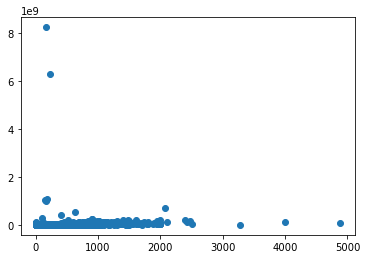

In [10]:
plt.scatter(x1, y1)

# EXTENSIVE DATA CLEANSING
After seen the poor linear regresion on original data

## Create an INDEX with build_squared_meters/price

In [11]:
realestate_no_null['index'] = realestate_no_null.price / realestate_no_null.builded_squared_meters

<ipython-input-11-5821cfa17f77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realestate_no_null['index'] = realestate_no_null.price / realestate_no_null.builded_squared_meters


In [12]:
realestate_no_null.count()

price                     9795
id_publicacion            9795
id_city                   9795
house_lat                 9795
house_long                9795
rooms                     9795
bathrooms                 9795
squared_meters            9795
builded_squared_meters    9795
house_details             9795
address                   9795
index                     9795
dtype: int64

In [13]:
pd.options.display.max_rows

60

In [14]:
realestate_no_null.head()

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,index
0,16500000.0,793771458,4,19.383400,-99.153381,7,4.0,252.0,490.0,"EXCELENTE OPORTUNIDAD PARA INVERSIONISTAS, CON...","Palenque 413, Narvarte, Benito Juarez, Distrit...",33673.469388
1,22000000.0,822644893,4,19.390625,-99.176448,2,5.0,650.0,650.0,Casa muy amplia con 650 m2 de construccion y e...,"Alabama 89, Napoles, Benito Juarez, Distrito F...",33846.153846
2,26000000.0,823060505,6,19.355168,-99.176567,4,4.0,345.0,347.0,Vive en una de las colonias con mayor plusvali...,"Manzano 30, Florida, Alvaro Obregon, Distrito ...",74927.953890
3,43000000.0,822087474,15,19.361988,-99.661890,4,6.0,416.0,601.0,EXCELENTE CASA EN VENTA EN CUMBRES SANTA FE \n...,"Santa Fe Cuajimalpa, Cuajimalpa De Morelos, Di...",71547.420965
4,18500000.0,823066941,5,19.353775,-99.157975,5,5.0,167.0,302.0,"Espectacular casa en venta, excelente ubicacio...","Xicotencatl 240, Del Carmen, Coyoacan, Distrit...",61258.278146


## Optimizing Data

In [15]:
#Data Cleansing with values < 50 squared meters
is_m2 =  realestate_no_null['builded_squared_meters']>=50
is_m2

0       True
1       True
2       True
3       True
4       True
        ... 
9908    True
9909    True
9910    True
9911    True
9912    True
Name: builded_squared_meters, Length: 9795, dtype: bool

In [16]:
realestate_clean = realestate_no_null[is_m2]
realestate_clean.shape

(9449, 12)

In [17]:
#Data Cleansing with values above $300,000,000 MXN
is_price =  realestate_no_null['price']<=300000000
is_price

0       True
1       True
2       True
3       True
4       True
        ... 
9908    True
9909    True
9910    True
9911    True
9912    True
Name: price, Length: 9795, dtype: bool

In [18]:
realestate_clean01 = realestate_clean[is_price]
realestate_clean01.shape

<ipython-input-18-42ec8eaff75f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  realestate_clean01 = realestate_clean[is_price]


(9441, 12)

## CLEAN DATA BASE ON INDEX

In [19]:
realestate_clean01.describe()

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,index
count,9.441000e+03,9.441000e+03,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9.441000e+03
mean,1.413157e+07,9.789777e+08,7.313314,19.362882,-99.249057,3.502065,2.970660,712.994966,359.445388,3.277079e+04
std,1.996070e+07,2.216427e+09,3.946775,0.064363,0.217755,1.446218,1.427146,5149.473560,268.264175,4.228796e+04
min,1.200000e+05,5.626449e+08,1.000000,19.190919,-99.999000,0.000000,-1.000000,1.000000,50.000000,1.230769e+02
25%,2.773000e+06,7.832007e+08,5.000000,19.313878,-99.303587,3.000000,2.000000,150.000000,184.000000,1.415827e+04
50%,7.000000e+06,8.016643e+08,7.000000,19.356233,-99.164409,3.000000,3.000000,231.000000,282.000000,2.714286e+04
75%,1.750000e+07,8.129399e+08,9.000000,19.402913,-99.131585,4.000000,4.000000,480.000000,450.000000,4.285714e+04
max,3.000000e+08,8.206163e+10,16.000000,20.021108,-98.563938,45.000000,33.000000,315000.000000,4883.000000,3.000000e+06


In [20]:
realestate_clean01['index'].describe()

count    9.441000e+03
mean     3.277079e+04
std      4.228796e+04
min      1.230769e+02
25%      1.415827e+04
50%      2.714286e+04
75%      4.285714e+04
max      3.000000e+06
Name: index, dtype: float64

In [21]:
#Data Cleansing with Index > number
is_index_high =  realestate_clean01['index']<=200000
is_index_high

0        True
1        True
2        True
3        True
4        True
        ...  
9908     True
9909     True
9910     True
9911     True
9912    False
Name: index, Length: 9441, dtype: bool

In [22]:
realestate_clean02 = realestate_clean01[is_index_high]
realestate_clean02.shape

(9431, 12)

In [23]:
#Data Cleansing with Index < number
is_index_low =  realestate_clean02['index']>=1000
is_index_low

0       True
1       True
2       True
3       True
4       True
        ... 
9907    True
9908    True
9909    True
9910    True
9911    True
Name: index, Length: 9431, dtype: bool

In [24]:
realestate_clean02b = realestate_clean02[is_index_low]
realestate_clean02b.shape

(9417, 12)

## REMOVE PROPERTIES CATALOGUED AS "REMATE BANCARIO"

In [25]:
realestate_clean03 = realestate_clean02[realestate_clean02['house_details'].str.contains("remate bancario", 
                                                                                         "REMATES BANCARIOS")]

In [26]:
realestate_clean04 = realestate_clean02[realestate_clean02['house_details'].str.contains("remates bancarios", 
                                                                                         "REMATE BANCARIO")]

In [27]:
list_clean01 = realestate_clean03['id_publicacion'].to_list()
len(list_clean01)

265

In [28]:
list_clean02 = realestate_clean04['id_publicacion'].to_list()
len(list_clean02)

69

In [29]:
new_clean01 = realestate_clean02[~realestate_clean02.id_publicacion.isin(list_clean01)]
new_clean02 = new_clean01[~new_clean01.id_publicacion.isin(list_clean02)]
new_clean02

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,index
0,16500000.0,793771458,4,19.383400,-99.153381,7,4.0,252.0,490.0,"EXCELENTE OPORTUNIDAD PARA INVERSIONISTAS, CON...","Palenque 413, Narvarte, Benito Juarez, Distrit...",33673.469388
1,22000000.0,822644893,4,19.390625,-99.176448,2,5.0,650.0,650.0,Casa muy amplia con 650 m2 de construccion y e...,"Alabama 89, Napoles, Benito Juarez, Distrito F...",33846.153846
2,26000000.0,823060505,6,19.355168,-99.176567,4,4.0,345.0,347.0,Vive en una de las colonias con mayor plusvali...,"Manzano 30, Florida, Alvaro Obregon, Distrito ...",74927.953890
3,43000000.0,822087474,15,19.361988,-99.661890,4,6.0,416.0,601.0,EXCELENTE CASA EN VENTA EN CUMBRES SANTA FE \n...,"Santa Fe Cuajimalpa, Cuajimalpa De Morelos, Di...",71547.420965
4,18500000.0,823066941,5,19.353775,-99.157975,5,5.0,167.0,302.0,"Espectacular casa en venta, excelente ubicacio...","Xicotencatl 240, Del Carmen, Coyoacan, Distrit...",61258.278146
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,9780000.0,807933991,8,19.286104,-99.189508,4,5.0,500.0,409.0,"Sala, comedor, estudio, antecomedor, despensa,...","Huehuetan 295, Heroes De Padierna, Tlalpan, Di...",23911.980440
9908,2950000.0,815932538,8,19.288653,-99.165674,3,1.0,200.0,145.0,"Excelente ubicacion cerca de Six Flags, amplio...","7 Sn, Miguel Hidalgo 4a Secc. Amp, Tlalpan, Di...",20344.827586
9909,6800000.0,806695516,8,19.270892,-99.150190,3,2.0,216.0,187.0,Este conjunto de 26 casas se dividio en 2 fase...,"Mirador 7, Tepepan, Tlalpan, Distrito Federal",36363.636364
9910,2400000.0,809404134,8,19.259785,-99.371561,2,2.0,1000.0,180.0,¡OPORTUNIDAD! \n \nADQUIERELA CON UN ENGANCHE ...,"Picacho Ajusco Sn, Santo Tomas Ajusco, Tlalpan...",13333.333333


## REMOVE PROPERTIES CATALOGUED AS "RENTA"

In [30]:
realestate_clean05 = new_clean02[new_clean02['house_details'].str.contains("RENTA", "renta")]

In [31]:
list_clean03 = realestate_clean05['id_publicacion'].to_list()
len(list_clean03)

76

In [32]:
realestate_clean06 = new_clean02[new_clean02['house_details'].str.contains("Renta")]

In [33]:
list_clean04 = realestate_clean06['id_publicacion'].to_list()
len(list_clean04)

48

In [34]:
new_clean03 = new_clean02[~new_clean02.id_publicacion.isin(list_clean03)]
new_clean04 = new_clean03[~new_clean03.id_publicacion.isin(list_clean04)]
new_clean04

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,index
0,16500000.0,793771458,4,19.383400,-99.153381,7,4.0,252.0,490.0,"EXCELENTE OPORTUNIDAD PARA INVERSIONISTAS, CON...","Palenque 413, Narvarte, Benito Juarez, Distrit...",33673.469388
1,22000000.0,822644893,4,19.390625,-99.176448,2,5.0,650.0,650.0,Casa muy amplia con 650 m2 de construccion y e...,"Alabama 89, Napoles, Benito Juarez, Distrito F...",33846.153846
2,26000000.0,823060505,6,19.355168,-99.176567,4,4.0,345.0,347.0,Vive en una de las colonias con mayor plusvali...,"Manzano 30, Florida, Alvaro Obregon, Distrito ...",74927.953890
3,43000000.0,822087474,15,19.361988,-99.661890,4,6.0,416.0,601.0,EXCELENTE CASA EN VENTA EN CUMBRES SANTA FE \n...,"Santa Fe Cuajimalpa, Cuajimalpa De Morelos, Di...",71547.420965
4,18500000.0,823066941,5,19.353775,-99.157975,5,5.0,167.0,302.0,"Espectacular casa en venta, excelente ubicacio...","Xicotencatl 240, Del Carmen, Coyoacan, Distrit...",61258.278146
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,9780000.0,807933991,8,19.286104,-99.189508,4,5.0,500.0,409.0,"Sala, comedor, estudio, antecomedor, despensa,...","Huehuetan 295, Heroes De Padierna, Tlalpan, Di...",23911.980440
9908,2950000.0,815932538,8,19.288653,-99.165674,3,1.0,200.0,145.0,"Excelente ubicacion cerca de Six Flags, amplio...","7 Sn, Miguel Hidalgo 4a Secc. Amp, Tlalpan, Di...",20344.827586
9909,6800000.0,806695516,8,19.270892,-99.150190,3,2.0,216.0,187.0,Este conjunto de 26 casas se dividio en 2 fase...,"Mirador 7, Tepepan, Tlalpan, Distrito Federal",36363.636364
9910,2400000.0,809404134,8,19.259785,-99.371561,2,2.0,1000.0,180.0,¡OPORTUNIDAD! \n \nADQUIERELA CON UN ENGANCHE ...,"Picacho Ajusco Sn, Santo Tomas Ajusco, Tlalpan...",13333.333333


In [35]:
new_clean04.count()

price                     9008
id_publicacion            9008
id_city                   9008
house_lat                 9008
house_long                9008
rooms                     9008
bathrooms                 9008
squared_meters            9008
builded_squared_meters    9008
house_details             9008
address                   9008
index                     9008
dtype: int64

In [36]:
new_clean04.describe()

,price,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,index
count,9.008000e+03,9.008000e+03,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000
mean,1.429431e+07,9.854912e+08,7.339920,19.362300,-99.250054,3.507216,2.981683,731.666127,363.007665,32592.804156
std,1.934740e+07,2.265012e+09,3.962705,0.064171,0.218871,1.459171,1.435562,5267.336086,268.458803,24655.575118
min,1.200000e+05,5.626449e+08,1.000000,19.190919,-99.999000,0.000000,-1.000000,1.000000,50.000000,123.076923
25%,2.950000e+06,7.835211e+08,5.000000,19.313518,-99.306807,3.000000,2.000000,150.000000,188.000000,14890.510385
50%,7.400000e+06,8.015505e+08,7.000000,19.355783,-99.164610,3.000000,3.000000,237.000000,288.000000,27643.253596
75%,1.790000e+07,8.129275e+08,9.000000,19.401956,-99.131377,4.000000,4.000000,488.000000,457.000000,43250.000000
max,2.236500e+08,8.206163e+10,16.000000,20.021108,-98.563938,45.000000,33.000000,315000.000000,4883.000000,186779.089376


### Plot linear regression

In [37]:
x2 = new_clean04["builded_squared_meters"]
y2 = new_clean04["price"]

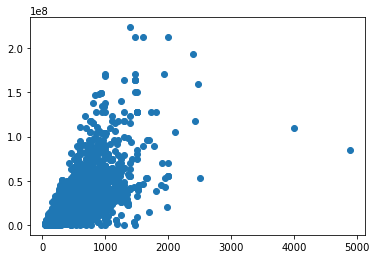

In [38]:
plt.scatter(x2, y2)

In [39]:
#Export file
new_clean04.to_csv('cleaned_df_cdmx.csv')

# MODEL1 - SINGLE VARIABLE
### builded_squared_meters

In [40]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = new_clean04["builded_squared_meters"].values.reshape(-1, 1)
y = new_clean04["price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (9008, 1) (9008, 1)


Text(0, 0.5, 'price')

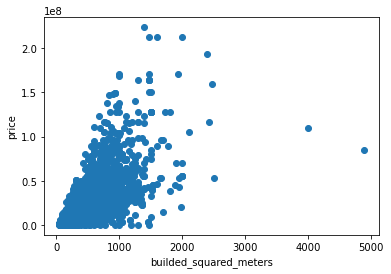

In [41]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("builded_squared_meters")
plt.ylabel("price")
### END SOLUTION

In [42]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [43]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [44]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [45]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 186056492979506.06
R-squared (R2 ): 0.5201046232844085


In [46]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.5201046232844085

In [47]:
with open('model01.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [48]:
with open('model01.pkl', 'rb') as fid:
    housemodel = pickle.load(fid)
    print(type(housemodel))
    print(housemodel.predict([[400]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[16333373.3758432]]


# MODEL 2 - MULTIVARIABLE
### squared_meters, builded_squared_meters

In [49]:
# Assign the data to X10 and y10

X10 = new_clean04[["squared_meters", "builded_squared_meters"]]
y10 = new_clean04["price"].values.reshape(-1, 1)
print(X10.shape, y10.shape)

(9008, 2) (9008, 1)


In [50]:
# Use train_test_split to create training and testing data

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, random_state=42)

### END SOLUTION

In [51]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
### END SOLUTION

In [52]:
# Fit the model to the training data and calculate the scores for the training and testing data
# Fitting our model with all of our features in X
model2.fit(X_train10, y_train10)
training_score10 = model2.score(X_train10, y_train10)
testing_score10 = model2.score(X_test10, y_test10)

print(f"Training Score: {training_score10}")
print(f"Testing Score: {testing_score10}")

Training Score: 0.5746046993082721
Testing Score: 0.519970495883163


Text(0.5, 1.0, 'Residual Plot')

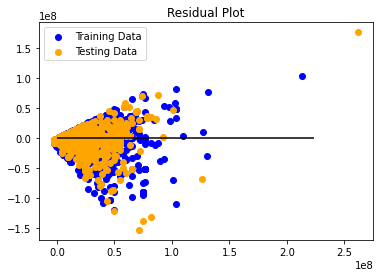

In [53]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model2.predict(X_train10), model2.predict(X_train10) - y_train10, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test10), model2.predict(X_test10) - y_test10, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [54]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted2 = model2.predict(X_test10)

# Score the predictions with mse and r2
mse_2 = mean_squared_error(y_test10, predicted2)
r2_2 = r2_score(y_test10, predicted2)

print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R2 ): {r2_2}")

### END SOLUTION

Mean Squared Error (MSE): 186108494467953.4
R-squared (R2 ): 0.519970495883163


In [55]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model2.score(X_test10, y_test10)
### END SOLUTION

0.519970495883163

In [56]:
with open('model02.pkl', 'wb') as fid:
    pickle.dump(model2, fid)

In [57]:
with open('model02.pkl', 'rb') as fid:
    housemodel2 = pickle.load(fid)
    print(type(housemodel2))
    print(housemodel2.predict([[400,500]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[21804974.6284422]]


# MODEL3 - MULTIVARIABLE

In [58]:
# Assign the data to X10 and y10

X20 = new_clean04[["builded_squared_meters", "squared_meters", "id_city"]]
y20 = new_clean04["price"].values.reshape(-1, 1)
print(X20.shape, y20.shape)

(9008, 3) (9008, 1)


In [59]:
# Use train_test_split to create training and testing data

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, random_state=42)

### END SOLUTION

In [60]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
### END SOLUTION

In [61]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model3.fit(X_train20, y_train20)

### END SOLUTION

LinearRegression()

In [62]:
# Fit the model to the training data and calculate the scores for the training and testing data
# Fitting our model with all of our features in X
training_score20 = model3.score(X_train20, y_train20)
testing_score20 = model3.score(X_test20, y_test20)

print(f"Training Score: {training_score20}")
print(f"Testing Score: {testing_score20}")

Training Score: 0.5749790417630505
Testing Score: 0.5210323757175778


Text(0.5, 1.0, 'Residual Plot')

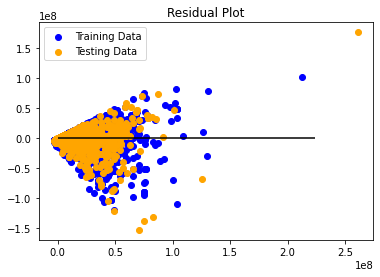

In [63]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model3.predict(X_train20), model3.predict(X_train20) - y_train20, c="blue", label="Training Data")
plt.scatter(model3.predict(X_test20), model3.predict(X_test20) - y_test20, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y20.min(), xmax=y20.max())
plt.title("Residual Plot")
### END SOLUTION

In [64]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted3 = model3.predict(X_test20)

# Score the predictions with mse and r2
mse_3 = mean_squared_error(y_test20, predicted3)
r2_3 = r2_score(y_test20, predicted3)

print(f"Mean Squared Error (MSE): {mse_3}")
print(f"R-squared (R2 ): {r2_3}")

### END SOLUTION

Mean Squared Error (MSE): 185696801320774.03
R-squared (R2 ): 0.5210323757175778


In [65]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model3.score(X_test20, y_test20)
### END SOLUTION

0.5210323757175778

In [66]:
with open('model03.pkl', 'wb') as fid:
    pickle.dump(model3, fid)

In [67]:
with open('model03.pkl', 'rb') as fid:
    housemodel3 = pickle.load(fid)
    print(type(housemodel3))
    print(housemodel3.predict([[400,500,14]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[16950113.87259185]]


In [68]:
#End of notebook